In [9]:
import numpy as np
import matplotlib.pyplot
import matplotlib.colors

import os
import urllib
import sys
import tarfile
import tensorflow as tf 


In [35]:
%matplotlib inline

In [2]:
# http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_11_06_2017.tar.gz
GRAPH_NAME = 'faster_rcnn_resnet101_coco_11_06_2017/frozen_inference_graph.pb'

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(GRAPH_NAME, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [38]:
def detect_color(img):
    hsv_img = matplotlib.colors.rgb_to_hsv(img)
    v = hsv_img[:,:,2].mean(axis=1)
    if v[0:int(v.shape[0]/2)].mean() > v[int(v.shape[0]/2):].mean():
        return 'RED'
    else:
        return 'GREEN'
    
def classify_image(img, output_dict):
    boxes = [box for box, cls, score in zip(output_dict['detection_boxes:0'][0],
       output_dict['detection_classes:0'][0],
       output_dict['detection_scores:0'][0]) if score > 0.7 and cls == 10]
    
    for box in boxes:
        x_0, y_0, x_1, y_1 = box
        subimg = image[int(image.shape[0]*x_0):int(image.shape[0]*x_1),int(image.shape[1]*y_0):int(image.shape[1]*y_1),:]

        return detect_color(subimg)
    
    
def light_status(idx):
    if idx >= 101 and idx <= 174:
        return 'RED'
    elif idx >= 174 and idx <= 218:
        return 'GREEN'
    else:
        return 'None'


def get_tensors(graph):
    with graph.as_default():
        ops = tf.get_default_graph().get_operations()
        all_tensor_names = {output.name for op in ops for output in op.outputs}
        image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')
        tensor_names = ['num_detections:0', 'detection_boxes:0', 'detection_scores:0', 'detection_classes:0']
        tensor_dict = {}
        for tensor_name in tensor_names:
            tensor_dict[tensor_name] = tf.get_default_graph().get_tensor_by_name(
                          tensor_name)
    return image_tensor, tensor_dict

GREEN


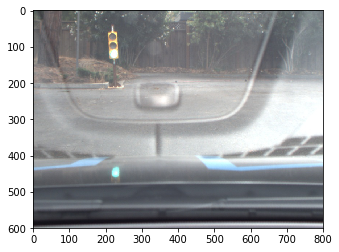

In [40]:
image_tensor,tensor_dict = get_tensors(detection_graph)

with detection_graph.as_default():
    with tf.Session() as sess:
        image = matplotlib.pyplot.imread('test_images/frame0190.jpg')
        output_dict = sess.run(tensor_dict, feed_dict={image_tensor: np.expand_dims(image, 0)})
        print(classify_image(image, output_dict))
        matplotlib.pyplot.imshow(image)
        
        
    

In [31]:
[cls for box, cls, score in zip(output_dict['detection_boxes:0'][0],
       output_dict['detection_classes:0'][0],
       output_dict['detection_scores:0'][0]) if score > 0.7 and cls == 10]

[10.0]